两种模型网络

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Creating a graph
1. 带环的有向图
2. 三角网络（四个王者峡谷地图）

/Users/duyan/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/duyan/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


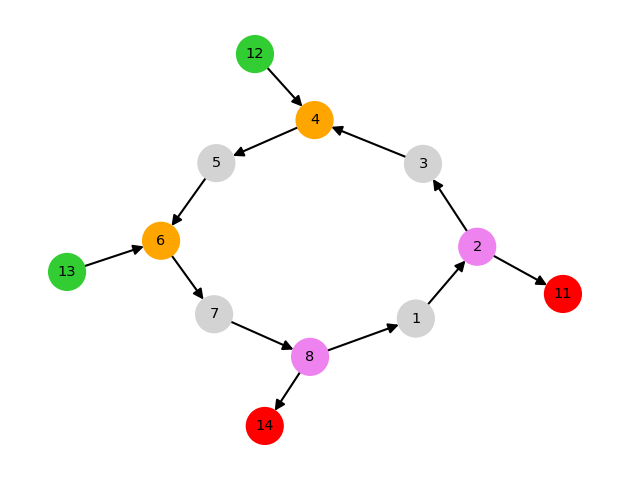

In [2]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (4, 3)

G = nx.DiGraph()
# 带环的有向图
G.add_weighted_edges_from([(1,2,1),(2,3,1),(3,4,1),(4,5,1),(5,6,1),(6,7,1),(7,8,1),(8,1,1),
                (2,11,1),(12,4,1),(13,6,1),(8,14,1)])
balance=[0]*8+[0.5,-0.5,-0.5,0.5]
color=['lightgray','violet','lightgray','orange','lightgray',
       'orange','lightgray','violet',
       'r','limegreen','limegreen','r']
true_label=[1,2,1,3,1,3,1,2,5,4,4,5]

# 三角网络
# G.add_weighted_edges_from([(1,2,1),
#                            (2,3,1),
#                            (4,1,1),(4,2,1),(4,5,1),
#                            (5,2,1),(5,3,1),(5,6,1),
#                            (6,3,1),
#                            (7,4,1),(7,5,1),(7,8,1),
#                            (8,5,1),(8,6,1),(8,9,1),
#                            (9,6,1)])
# balance=[0]*9
# balance[2]=1
# balance[6]=-1
# color=['lightgray','violet','r','orange','limegreen','violet','c','orange','lightgray']
# true_label=[1,2,3,4,5,2,6,4,1]

nx.draw_kamada_kawai(G, with_labels=True, node_color=color, node_size=300, font_size=7)
plt.show()

## RoleMagnet

In [3]:
import rolemagnet as rm
vec,role,label=rm.role_magnet(G, balance=balance)

Embedding: 100.00%  -
SOM shape: [20, 9]
Training SOM: 96


## Visualization
可视化节点的向量表示，用PCA降到二维后再次可视化

三维嵌入结果
1 	 [-5.79994523 -0.66704634  0.        ]
2 	 [-9.12537282 -3.48353258  0.        ]
3 	 [-5.75574464e+00  3.49823626e-03  0.00000000e+00]
4 	 [-9.13011595  3.42221188  0.        ]
5 	 [-5.79434071  0.67405011  0.        ]
6 	 [-9.13011595  3.42221188  0.        ]
7 	 [-5.75574464e+00  3.49823626e-03  0.00000000e+00]
8 	 [-9.12537282 -3.48353258  0.        ]
11 	 [14.83177732  9.10307421 10.56463571]
12 	 [ 14.97659906  -9.04875363 -10.56463571]
13 	 [ 14.97659906  -9.04875363 -10.56463571]
14 	 [14.83177732  9.10307421 10.56463571]


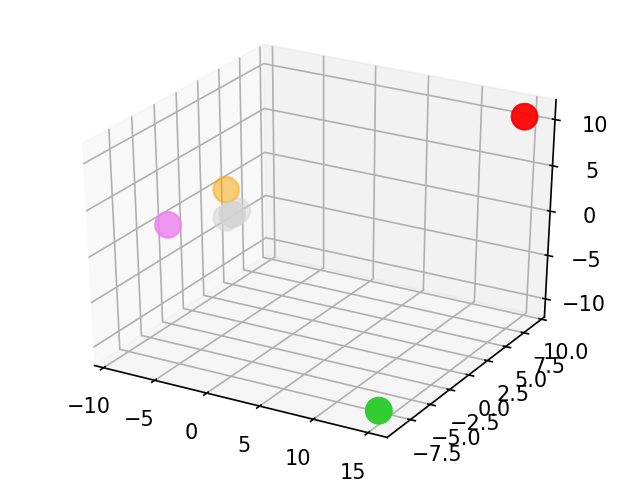

二维嵌入结果
1 	 [ 0.08240365 -0.54625095]
2 	 [ 0.43627252 -0.86127396]
3 	 [-0.00205447 -0.54158846]
4 	 [-0.43366623 -0.85653592]
5 	 [-0.08653673 -0.54471679]
6 	 [-0.43366623 -0.85653592]
7 	 [-0.00205447 -0.54158846]
8 	 [ 0.43627252 -0.86127396]
11 	 [-2.36732802  1.4024411 ]
12 	 [2.36884274 1.4024411 ]
13 	 [2.36884274 1.4024411 ]
14 	 [-2.36732802  1.4024411 ]


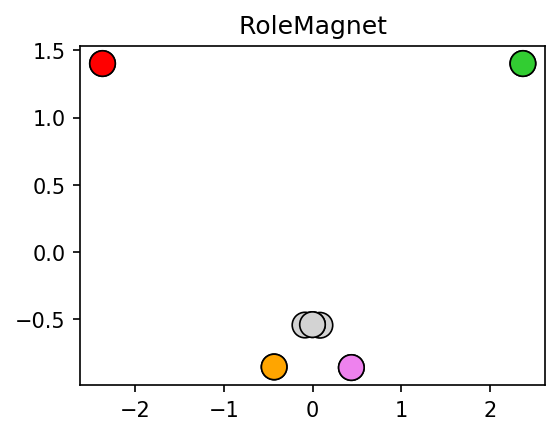

In [4]:
print ('三维嵌入结果')
for i in range(len(G.nodes)):
    print (list(G.nodes)[i],'\t',vec[i])
    
from mpl_toolkits.mplot3d import Axes3D
coord = np.transpose(vec)
fig = plt.figure(figsize=(4,3))
ax = Axes3D(fig)
ax.scatter(coord[0], coord[1], coord[2], c=color, s=150)
plt.show()

# 再次降到二维
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

reduced=PCA(n_components=2).fit_transform(StandardScaler().fit_transform(vec))
print ('二维嵌入结果')
for i in range(len(G.nodes)):
    print (list(G.nodes)[i],'\t',reduced[i])

coord = np.transpose(reduced)
plt.scatter(coord[0], coord[1], c=color, s=150, linewidths=0.8, edgecolors='k')
plt.title("RoleMagnet")
plt.show()

## Evaluation
用 Adjusted Rand Index 和 V-Measure 两种指标评价聚类结果

In [5]:
from sklearn.metrics.cluster import adjusted_rand_score, homogeneity_completeness_v_measure

print('Adjusted Rand Index:',adjusted_rand_score(true_label,label))
print('V-Measure:',homogeneity_completeness_v_measure(true_label,label))
print('\n聚类结果')
for k,v in role.items():
    print(k,v[0])
    for i in v[1]:
        print('   ',list(G.nodes)[i])

Adjusted Rand Index: 1.0
V-Measure: (1.0, 1.0, 1.0)

聚类结果
91 [-0.  -1.2]
    1
    3
    5
    7
99 [ 0.9 -1.8]
    2
    8
72 [-0.9 -1.8]
    4
    6
8 [-5.1  3. ]
    11
    14
179 [5.1 3. ]
    12
    13
